In [1]:
import pandas as pd
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from datetime import datetime
from monthdelta import monthdelta

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
#Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Measurement', 'Station']

In [6]:
# Assign the Measurement and Station classes to variables
Measurement = Base.classes.Measurement
Station = Base.classes.Station

In [7]:
#Establish the session
session = Session(engine)

In [8]:
# Printing the total dates in Measurement table
session.query(func.count(Measurement.date)).all()

[(18103)]

In [9]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
### BEGIN SOLUTION
#df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
#df.set_index('emoji_id', inplace=True, )
### END SOLUTION
#df.head(10)

In [10]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
### BEGIN SOLUTION
#results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
 #   order_by(Emoji.score.desc()).all()
### END SOLUTION

 # Precipitation Analysis

In [11]:

#Design a query to retrieve the last 12 months of precipitation data.
#Getting the last Date in the Dataset
last_date = session.query(Measurement, Measurement.date).order_by(Measurement.date.desc()).first()[1]

print(last_date)



2017-08-23


In [12]:
# Substracting 12 months from the last date in Dataset(1 year ago from the latest date)
last = datetime.strptime(last_date, '%Y-%m-%d')
year_ago = last - monthdelta(12)
print(year_ago)

2016-08-23 00:00:00


In [13]:

#Select only the date and prcp values.

precipitation_list = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

precipitation_list[:5]

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15)]

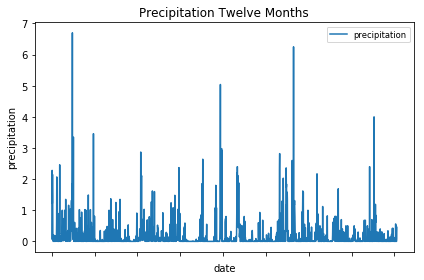

In [21]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
df_prec = pd.DataFrame(precipitation_list, columns=["date", "precipitation"])
df_prec= df_prec.set_index("date")

# Plot the Results
### BEGIN SOLUTION
#Axes limits

df_prec.plot()
plt.xticks(rotation='vertical')
plt.title("Precipitation Twelve Months")
plt.xlabel("date")
plt.ylabel("precipitation")
plt.legend(fontsize="small",loc="best")
plt.tight_layout()
plt.show()
### END SOLUTION
#Plot the results using the DataFrame plot method.